This model uses ANN binary classification technique to predict if the bank customers are leaving the bank or not i.e Customer Churn prediction using the available input data

In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 5.8 MB 22.3 MB/s 
     |████████████████████████████████| 438 kB 62.8 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Divide dataset in to independent and dependent features
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [24]:
## Exploratory data analysis

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [26]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [27]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [28]:
y.value_counts() #output seems marginally imbalanced. But might not effect so much

0    7963
1    2037
Name: Exited, dtype: int64

In [29]:
#Feature engineering

In [30]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [31]:
#Deleting columns.
x=x.drop(["Geography","Gender"],axis=1)


In [33]:
#Concatenate the one hot encoded ones.
x=pd.concat([x,geography,gender],axis=1)

In [35]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [36]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [39]:
x_train.shape

(8000, 11)

In [40]:
## ANN architechture

In [42]:
#Import required librabries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [47]:
##Initialize ANN
classifier=Sequential()
#Adding input layer
classifier.add(Dense(units=11,activation='relu'))
#Add 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
#Add 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [48]:
#Add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [51]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) #By default it is 0.1. We need lesser and hence we specify
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
#Early stopping
import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [54]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.3109 - accuracy: 0.8709 - val_loss: 0.3976 - val_accuracy: 0.8478
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3140 - accuracy: 0.8701 - val_loss: 0.4104 - val_accuracy: 0.8360
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.8694 - val_loss: 0.3795 - val_accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3100 - accuracy: 0.8718 - val_loss: 0.3929 - val_accuracy: 0.8519
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3113 - accuracy: 0.8701 - val_loss: 0.4019 - val_accuracy: 0.8463
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3111 - accuracy: 0.8703 - val_loss: 0.3814 - val_accuracy: 0.8459
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3131 - accuracy: 0.8703 - val_loss: 0.3742 - val_accuracy:

In [57]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

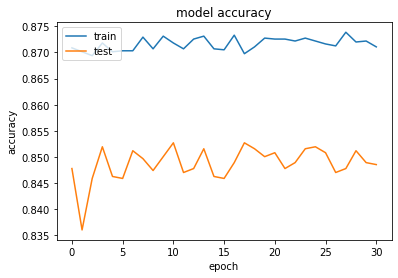

In [58]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [59]:
#Prediction for test data
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

In [60]:
#Make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1507,   88],
       [ 203,  202]])

In [62]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8545

In [64]:
#Access the weights
#classifier.get_weights()

We achieved a accuracy of 85 percent, which is pretty good. This further can be improved by hyper parameter finetuning or try adding dropout function for layers.